## D8：Pandas 物件的定義與屬性

In [1]:
import pandas as pd
print(pd)
print(pd.__version__)

<module 'pandas' from 'C:\\Users\\mikal\\anaconda3\\envs\\Scikit_learn\\lib\\site-packages\\pandas\\__init__.py'>
1.5.2


#### 1. Pandas 最重要的貢獻是提出了兩種資料結構：* 「DataFrame」和「Series」。
* Series 是一種一維的資料結構，用來一定序列型的資料。
* DataFrame 是二維的資料結構，用表格的形式存放常見的資料內容。

In [5]:
import pandas as pd
s = pd.Series([1, 2, 3])
display(s)

# dtype: int64
print(type(s))

0    1
1    2
2    3
dtype: int64

<class 'pandas.core.series.Series'>


In [6]:
import pandas as pd
df = pd.DataFrame([1, 2, 3])
print(df)
#     0
# 0  1
# 1  2
# 2  3
print(type(df))

   0
0  1
1  2
2  3
<class 'pandas.core.frame.DataFrame'>


#### 2. Series 其實就是 NumPy 的 Array 的加工品，所以 Array 有的屬性， Series 絕大部分都可延用
1. pandas.Series<br>
class pandas.Series(data=None, index=None, dtype=None, name=None, copy=False, fastpath=False)

In [7]:
import pandas as pd
s = pd.Series([1, 2, 3])
print(s.shape) # (3, )
print(s.size) # 3
print(s.dtype) # int64

(3,)
3
int64


In [11]:
d = {'a': 1, 'b': 2, 'c': 3}
ser = pd.Series(data=d, index=['a', 'b', 'c'])
display(ser)

a    1
b    2
c    3
dtype: int64

In [13]:
r = [1, 2]
ser = pd.Series(r, copy=False)
ser.iloc[0] = 999
print(ser)

0    999
1      2
dtype: int64


In [17]:
import numpy as np
r = np.array([1, 2])
ser = pd.Series(r, copy=False)
ser.iloc[0] = 999
print('r=',r)
print('ser=\n',ser)

r= [999   2]
ser=
 0    999
1      2
dtype: int32


In [18]:
import numpy as np
r = np.array([1, 2])
ser = pd.Series(r, copy=True)
ser.iloc[0] = 999
print('r=',r)
print('ser=\n',ser)

r= [1 2]
ser=
 0    999
1      2
dtype: int32


#### 3. 完整屬性可以從 官網文件 中找到: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.html

#### 4. DataFrame 的常用屬性 : ataFrame 也是 NumPy 的 Array 的加工品，所以 Array 有的屬性， DataFrame 一樣可以使用用
class pandas.DataFrame(data=None, index=None, columns=None, dtype=None, copy=None)

In [19]:
df = pd.DataFrame([1, 2, 3])
print(df.shape) # (3, 1)
print(df.size) # 3
print(df.dtypes) 

(3, 1)
3
0    int64
dtype: object


#### 5. 完整屬性可以從 官網文件 中找到:  https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html

In [24]:
d = {'col1': [1, 2], 'col2': [3, 4]}
df = pd.DataFrame(data=d)
display(df)
print(df.dtypes)

df = pd.DataFrame(data=d, dtype=np.int8)
display(df)
df.dtypes

,col1,col2
0,1,3
1,2,4


col1    int64
col2    int64
dtype: object


,col1,col2
0,1,3
1,2,4


col1    int8
col2    int8
dtype: object

In [26]:
d = {'col1': [0, 1, 2, 3], 'col2': pd.Series([2, 3], index=[2, 3])}
pd.DataFrame(data=d, index=[0, 1, 2, 3])

,col1,col2
0,0,NaN
1,1,NaN
2,2,2.0
3,3,3.0


In [27]:
df2 = pd.DataFrame(np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]]),columns=['a', 'b', 'c'])
df2

,a,b,c
0,1,2,3
1,4,5,6
2,7,8,9


In [29]:
data = np.array([(1, 2, 3), (4, 5, 6), (7, 8, 9)],
                dtype=[("a", "i4"), ("b", "i4"), ("c", "i4")])
df3 = pd.DataFrame(data, columns=['c', 'a'])
df3

,c,a
0,3,1
1,6,4
2,9,7


In [30]:
from dataclasses import make_dataclass

Point = make_dataclass("Point", [("x", int), ("y", int)])
pd.DataFrame([Point(0, 0), Point(0, 3), Point(2, 3)])

,x,y
0,0,0
1,0,3
2,2,3


#### 6. Pandas 大部分沿用 NumPy 定義的型態，只是沒有那麼嚴格。除此之外， Pandas 新增了兩種在資料分析時常用的型態「timedelta」和「category」。
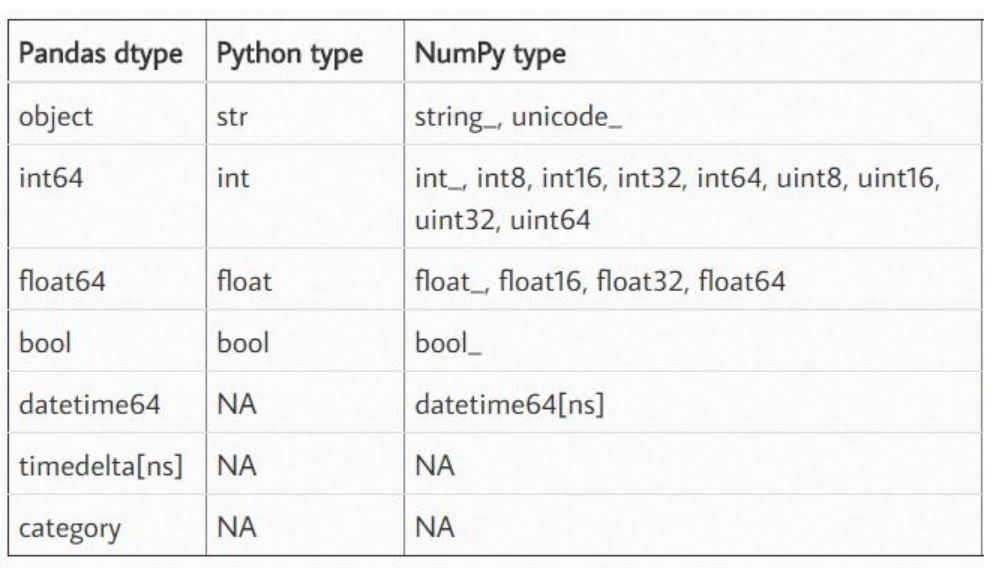

### 參考資料: Pandas 官方網站https://pandas.pydata.org/

## D9：使用 Pandas DataFrame 的初始化
* DataFrame 是一種二維的資料結構，使用表格的方式儲存資料。我們會把直向的欄位稱為是 Column、橫向的資料稱為是 Row。
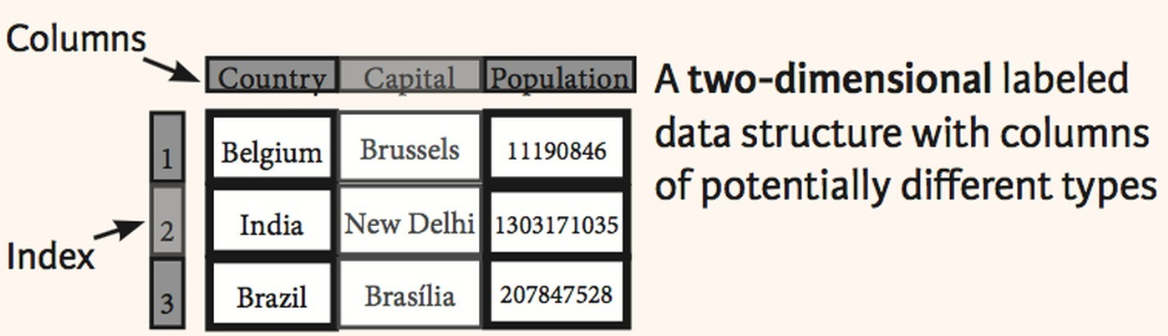

#### 1.建立 Pandas 物件
* 從原有的物件轉換
* 從外部資料讀取而來

In [7]:
import pandas as pd
s = pd.Series([1,2,3])
print(s,'\n')
s = pd.Series([1,2,3],  index=['Amy', 'Bob', 'Tom'])
print(s)

0    1
1    2
2    3
dtype: int64 

Amy    1
Bob    2
Tom    3
dtype: int64


In [18]:
import pandas as pd
df = pd.DataFrame([1, 2, 3])
print(df,'\n')

df = pd.DataFrame([1, 2, 3], index=['a', 'b', 'c'], columns=['No1'])  # index,columns use 'list'
print(df,'\n')

df = pd.DataFrame([[1, 2, 3], [4, 5, 6]], index=['a', 'b'], columns=['No1','No2','No3'])
print(df,'\n')

df = pd.DataFrame({
    'Name': ['Alice', 'Bob'],
    'Age': [18, 20],})
print(df,'\n')

df = pd.DataFrame([
  {'Name': 'Alice', 'Age': 18},
  {'Name': 'Bob', 'Age': 20} ])
print(df,'\n')

   0
0  1
1  2
2  3 

   No1
a    1
b    2
c    3 

   No1  No2  No3
a    1    2    3
b    4    5    6 

    Name  Age
0  Alice   18
1    Bob   20 

    Name  Age
0  Alice   18
1    Bob   20 



#### 2.DataFrame 的來源樣態可以很多元 
* DataFrame 是一種二維的資料結構，其中的欄位是由多個 Series 組成：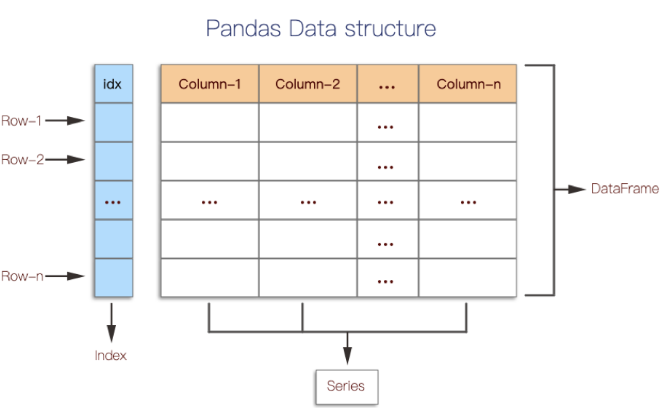

In [23]:
import pandas as pd
df = pd.DataFrame([[1, 2, 3], [4, 5, 6]], index=['a', 'b'], columns=['A', 'B', 'C'])
print(df)
print("df['B']=\n", df['B'])
print("type(df['B'])= ",type(df['B']))

   A  B  C
a  1  2  3
b  4  5  6
df['B']=
 a    2
b    5
Name: B, dtype: int64
type(df['B'])=  <class 'pandas.core.series.Series'>


#### 3. DataFrame 的常用屬性

In [24]:
print(df.shape)
print(df.size)
print(df.index)
print(df.columns)
print(df.values)

(2, 3)
6
Index(['a', 'b'], dtype='object')
Index(['A', 'B', 'C'], dtype='object')
[[1 2 3]
 [4 5 6]]


In [27]:
print('df.head() =\n',df.head())
print('df.tail() =\n',df.tail())
print('df.df.describe() =\n', df.describe())
print('df.info()=\n',df.info())  # 可以看到該檔案的資訊 (讀檔用)

df.head() =
    A  B  C
a  1  2  3
b  4  5  6
df.tail() =
    A  B  C
a  1  2  3
b  4  5  6
df.df.describe() =
              A        B        C
count  2.00000  2.00000  2.00000
mean   2.50000  3.50000  4.50000
std    2.12132  2.12132  2.12132
min    1.00000  2.00000  3.00000
25%    1.75000  2.75000  3.75000
50%    2.50000  3.50000  4.50000
75%    3.25000  4.25000  5.25000
max    4.00000  5.00000  6.00000
<class 'pandas.core.frame.DataFrame'>
Index: 2 entries, a to b
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A       2 non-null      int64
 1   B       2 non-null      int64
 2   C       2 non-null      int64
dtypes: int64(3)
memory usage: 64.0+ bytes
df.info()=
 None
